In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# 데이터셋 읽기

In [85]:
# 데이터파일 읽기
data = pd.read_csv('data/cs-training.csv')
data.shape

(150000, 12)

In [86]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [87]:
data.columns[0]

'Unnamed: 0'

In [88]:
# 첫 컬럼의 index 항목 제거 (Unnamed: 0)
data.drop(columns=data.columns[0], inplace=True) #inplace=True: 원본(data)를 변경

In [89]:
data.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


- 제공되는 데이터셋의 컬럼명이 이해하기 어렵거나 사용하기 어렵다면 변경하도록 한다.
    - 컬럼명을 소문자로 변경함.
    - ex) 약어를 원래 의미의 단어들로 변경. 영문->한글 등등

In [90]:
 [col.lower() for col in data.columns]

['seriousdlqin2yrs',
 'revolvingutilizationofunsecuredlines',
 'age',
 'numberoftime30-59dayspastduenotworse',
 'debtratio',
 'monthlyincome',
 'numberofopencreditlinesandloans',
 'numberoftimes90dayslate',
 'numberrealestateloansorlines',
 'numberoftime60-89dayspastduenotworse',
 'numberofdependents']

In [91]:
data.columns = [col.lower() for col in data.columns]  #data.columns = 컬럼리스트 : 전체컬럼명을 다 변경할 경우 사용.
data.head(2)

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


# EDA

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   seriousdlqin2yrs                      150000 non-null  int64  
 1   revolvingutilizationofunsecuredlines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   numberoftime30-59dayspastduenotworse  150000 non-null  int64  
 4   debtratio                             150000 non-null  float64
 5   monthlyincome                         120269 non-null  float64
 6   numberofopencreditlinesandloans       150000 non-null  int64  
 7   numberoftimes90dayslate               150000 non-null  int64  
 8   numberrealestateloansorlines          150000 non-null  int64  
 9   numberoftime60-89dayspastduenotworse  150000 non-null  int64  
 10  numberofdependents                    146076 non-null  float64
dtype

In [93]:
data.describe().T  #dataframe/ndarray .T (Transpose-전처) : 컬럼<->행

,count,mean,std,min,25%,50%,75%,max
seriousdlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
revolvingutilizationofunsecuredlines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
numberoftime30-59dayspastduenotworse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
debtratio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
monthlyincome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
numberofopencreditlinesandloans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
numberoftimes90dayslate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
numberrealestateloansorlines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
numberoftime60-89dayspastduenotworse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [94]:
# 타겟(seriousdlqin2yrs) 분포 확인
data['seriousdlqin2yrs'].value_counts()

seriousdlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [95]:
data['seriousdlqin2yrs'].value_counts(normalize=True)

seriousdlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

In [96]:
# 원소의 개수
len(data['seriousdlqin2yrs']), data['seriousdlqin2yrs'].size, data['seriousdlqin2yrs'].shape

(150000, 150000, (150000,))

In [97]:
# 비율로 보기
data['seriousdlqin2yrs'].value_counts()/len(data['seriousdlqin2yrs'])
# 불균형 데이터 - 평가지표: accuaracy(X). recall, precision, f1, roc auc

seriousdlqin2yrs
0    0.93316
1    0.06684
Name: count, dtype: float64

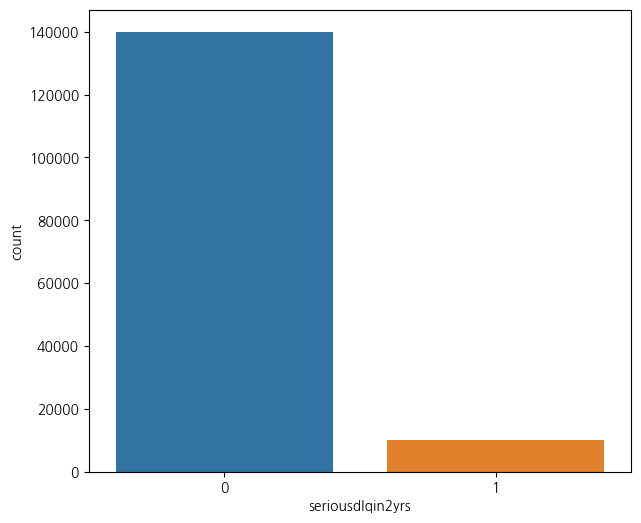

In [98]:
plt.figure(figsize=(7,6))
sns.countplot(x='seriousdlqin2yrs', data=data)
plt.show()

# 결측치 처리

## 결측치 확인

In [99]:
# data.isnull()
data.isna().sum() # True개수

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

In [100]:
data.isna().mean() # True의 비율

seriousdlqin2yrs                        0.000000
revolvingutilizationofunsecuredlines    0.000000
age                                     0.000000
numberoftime30-59dayspastduenotworse    0.000000
debtratio                               0.000000
monthlyincome                           0.198207
numberofopencreditlinesandloans         0.000000
numberoftimes90dayslate                 0.000000
numberrealestateloansorlines            0.000000
numberoftime60-89dayspastduenotworse    0.000000
numberofdependents                      0.026160
dtype: float64

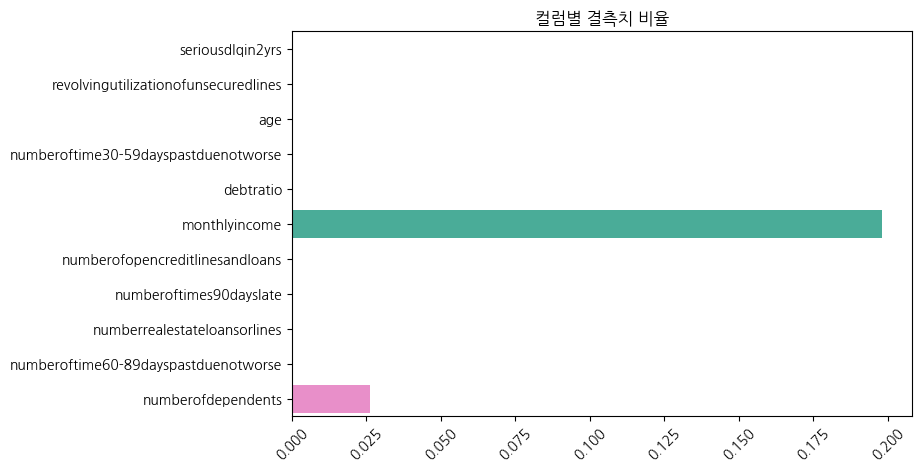

In [101]:
y = data.isna().mean()
plt.figure(figsize=(8,5))
plt.title('컬럼별 결측치 비율')
sns.barplot(x=y, y=data.columns)
plt.xticks(rotation=45)
plt.show()

In [102]:
# 중앙값, 평균값 확인
data.aggregate(['median', 'mean'])[['monthlyincome','numberofdependents']].T

,median,mean
monthlyincome,5400.0,6670.221237
numberofdependents,0.0,0.757222


## 결측치 처리

### monthly income 확인

In [103]:
np.round(data.monthlyincome.describe(), 2)  #np.round(값, 2) 소숫점 2자리 이하에서 반올림

count     120269.00
mean        6670.22
std        14384.67
min            0.00
25%         3400.00
50%         5400.00
75%         8249.00
max      3008750.00
Name: monthlyincome, dtype: float64

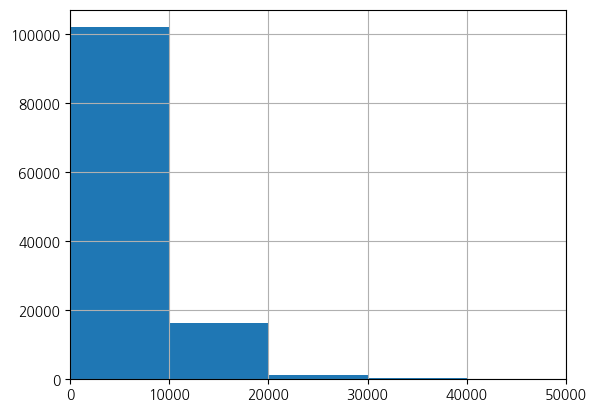

In [104]:
data.monthlyincome.hist(bins=300)
plt.xlim(0, 50000)
plt.show()

In [105]:
data.monthlyincome.median()

5400.0

In [106]:
# fillna(채울값) 결측치를 채울값으로 채운다.
# monthly income 의 결측치 중앙값으로 대체
data.monthlyincome.fillna(data.monthlyincome.median(), inplace=True)

### numberofdependents

In [107]:
data.numberofdependents.value_counts().sort_index() #sort_index() 행이름(index)으로 정렬

numberofdependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: count, dtype: int64

In [108]:
data.numberofdependents.value_counts()/len(data)

numberofdependents
0.0     0.579347
1.0     0.175440
2.0     0.130147
3.0     0.063220
4.0     0.019080
5.0     0.004973
6.0     0.001053
7.0     0.000340
8.0     0.000160
10.0    0.000033
9.0     0.000033
20.0    0.000007
13.0    0.000007
Name: count, dtype: float64

In [109]:
# 최빈값이 0인데 비율이 58% 정도 됨. 결측치 최빈값인 0 으로 대체
data.numberofdependents.fillna(0, inplace=True)

In [110]:
data.isna().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

In [111]:
data.numberofdependents.describe()

count    150000.000000
mean          0.737413
std           1.107021
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: numberofdependents, dtype: float64

## 이상치 확인 및 처리

### IQR 기반 이상치 검출
- IQR : 3분위수-1분위수
- 이상치 기준 (rate는 일반적으로 1.5사용)
    - 극단적으로 작은 값 범위
         - 1분위수 - IQR*rate 보다 작은수
    - 극단적으로 큰 값 범위
        - 3분위 + IQR*rate 보다 큰수

In [112]:
def get_outlier(data, rate=1.5):
    """
    IQR 기반으로 Outlier 값 조회 메소드
    [Parameter]
        data: array-like -Outlier 계산할 데이터
        rate: IQR에 몇배를 극단치 계산에 사용할 지 비율. rate를 크게하면 정상범위를 넓게 잡는다. 작게 주면 범위를 좁게 잡는다.
    [Return]
        bool type ndarray: 각 원소별 outlier 여부 (True: Outlier(이상치), False: 정상범위값)
    """
    q1 = np.quantile(data, q=0.25)  #분위수 계산: np.quantile(값, q='분위')
    q3 = np.quantile(data, q=0.75)
    IQR = q3 - q1
    return (data < q1 - IQR * rate) | (data > q3 + IQR * rate)

In [113]:
get_outlier(np.array([1, 100,10,2,3,-100]))

array([False,  True, False, False, False,  True])

## 각 컬럼별 이상치 처리

### revolvingutilizationofunsecuredlines
- 전체 운용가능한 돈 대비 현재 운용가능한 돈의 비율 (남은신용한도+통장잔고/ 총신용한도+통장잔고)
- 1초과하는 값들을 1로 변경한다.

In [114]:
#확인
print(data['revolvingutilizationofunsecuredlines'].describe())
print('1 초과값 개수',(data['revolvingutilizationofunsecuredlines'] > 1).sum())

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64
1 초과값 개수 3321


In [115]:
data.loc[data['revolvingutilizationofunsecuredlines']>1, 'revolvingutilizationofunsecuredlines'].describe()


count     3321.000000
mean       259.773362
std       1659.034074
min          1.000059
25%          1.019996
50%          1.074633
75%          1.301096
max      50708.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64

In [116]:
# 1초과하는 값들을 1로 대체
data.loc[data['revolvingutilizationofunsecuredlines']>1, 'revolvingutilizationofunsecuredlines'] = 1

In [117]:
#확인
print(data['revolvingutilizationofunsecuredlines'].describe())
print('1 초과값 총개수',(data['revolvingutilizationofunsecuredlines'] > 1).sum())

count    150000.000000
mean          0.319196
std           0.349481
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max           1.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64
1 초과값 총개수 0


### age
- 대출자 나이
- 최소값이 0, 최대값 109
- 중위수로 변환 

In [118]:
data['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [119]:
# 0이 한명, 그다음은 21부터 존재 한다. 
data['age'].value_counts().sort_index()

age
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: count, Length: 86, dtype: int64

In [120]:
data.loc[data['age']==0]

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [121]:
data.loc[data['age']==0, 'age'] = data['age'].median()

In [122]:
data['age'].describe()

count    150000.000000
mean         52.295553
std          14.771249
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

### numberoftime30-59dayspastduenotworse, numberoftime60-89dayspastduenotworse, numberoftimes90dayslate

- 30 ~ 59, 60 ~ 89, 90이상 연체한 횟수
- 96, 98 두개의 값을 가지는 행이 있다.
    - 96은 5개 98은 264개로 세 컬럼의 같은 행이 같이 두 값을 가지고 있다. 
    - 이런 경우 특정 의미를 표현하는 코드 값일 수 있다. 그래서 제거하지 않고 유지한다.

In [123]:
data['numberoftime30-59dayspastduenotworse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: numberoftime30-59dayspastduenotworse, dtype: float64

In [124]:
data['numberoftime30-59dayspastduenotworse'].value_counts().sort_index()

numberoftime30-59dayspastduenotworse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: count, dtype: int64

### numberoftime60-89dayspastduenotworse

In [125]:
data['numberoftime60-89dayspastduenotworse'].describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: numberoftime60-89dayspastduenotworse, dtype: float64

In [126]:
data['numberoftime60-89dayspastduenotworse'].value_counts().sort_index()

numberoftime60-89dayspastduenotworse
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: count, dtype: int64

### numberoftimes90dayslate

In [127]:
data['numberoftimes90dayslate'].describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: numberoftimes90dayslate, dtype: float64

In [128]:
data['numberoftimes90dayslate'].value_counts().sort_index()

numberoftimes90dayslate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: count, dtype: int64

In [129]:
data.loc[(data['numberoftime30-59dayspastduenotworse'] > 95) & 
         (data['numberoftime60-89dayspastduenotworse'] > 95) & 
         (data['numberoftimes90dayslate'] > 95)].shape

# 위 세개 컬럼에서 96, 98 을 가지는 행이 동일하다.
# 96, 98 은 은행에서 사용하는 코드값으로 추측할 수 있다. 

(269, 11)

In [130]:
data.loc[(data['numberoftime30-59dayspastduenotworse'] == 96) & 
         (data['numberoftime60-89dayspastduenotworse'] == 96) & 
         (data['numberoftimes90dayslate'] == 96), ['numberoftime30-59dayspastduenotworse','numberoftime60-89dayspastduenotworse','numberoftimes90dayslate']]

,numberoftime30-59dayspastduenotworse,numberoftime60-89dayspastduenotworse,numberoftimes90dayslate
41944,96,96,96
69478,96,96,96
84167,96,96,96
94106,96,96,96
120049,96,96,96


### debtratio 
- 소득 대비 부채비율(대출상환금+생활비/소득)
- 이상치가 아닌 값들 중 최대값으로 대체한다. 

In [131]:
data['debtratio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: debtratio, dtype: float64

In [132]:
get_outlier(data['debtratio']).sum() #이상치 개수

31311

In [133]:
get_outlier(data['debtratio']).mean()

0.20874

In [134]:
# 9분위수
np.quantile(data['debtratio'], q=0.9)

1267.0

In [135]:
# outlier 아닌 값들 중 최대값으로 대체
# ~ : not
max_value_debt = np.max(data.debtratio[~get_outlier(data['debtratio'])]) # 정상범위 값 중 최대값 조회
data.loc[data['debtratio']>max_value_debt, 'debtratio'] = max_value_debt

In [136]:
max_value_debt

1.906764531

In [137]:
get_outlier(data['debtratio']).sum()

0

In [138]:
data['debtratio'].describe()

count    150000.000000
mean          0.662995
std           0.687610
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max           1.906765
Name: debtratio, dtype: float64

<Axes: >

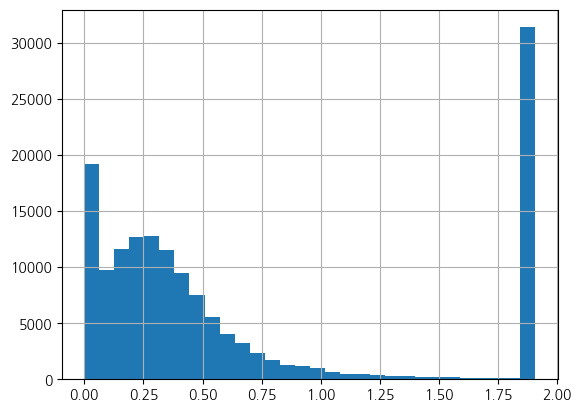

In [139]:
data['debtratio'].hist(bins=30)

## monthlyincome
- 월간 소득
- 이상치를 이상치 아닌 값들의 최대 값으로 대체한다.

In [140]:
get_outlier(data['monthlyincome']).sum()

9149

In [141]:
get_outlier(data['monthlyincome']).mean()

0.06099333333333333

In [142]:
np.round(data.monthlyincome.describe(), 3)
# max: 3,000,000 

count     150000.000
mean        6418.455
std        12890.396
min            0.000
25%         3903.000
50%         5400.000
75%         7400.000
max      3008750.000
Name: monthlyincome, dtype: float64

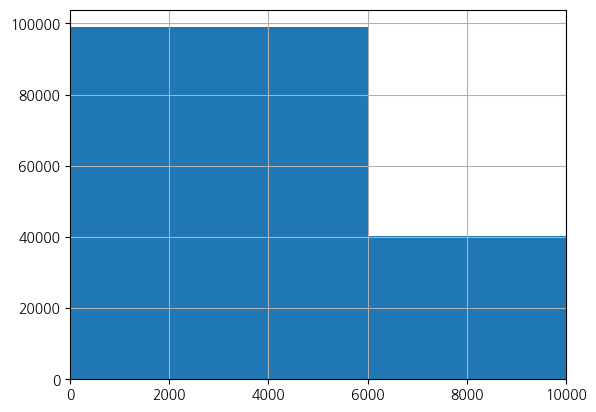

In [143]:
data.monthlyincome.hist(bins=500)
plt.xlim(0,10000)
plt.show()

In [144]:
max_value_income = np.max(data.monthlyincome[~get_outlier(data['monthlyincome'])])
# 정상값의 최대값으로 변환
data.loc[data['monthlyincome']>=max_value_income, 'monthlyincome'] = max_value_income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [145]:
max_value_income

12645.0

In [146]:
get_outlier(data['monthlyincome']).sum()

0

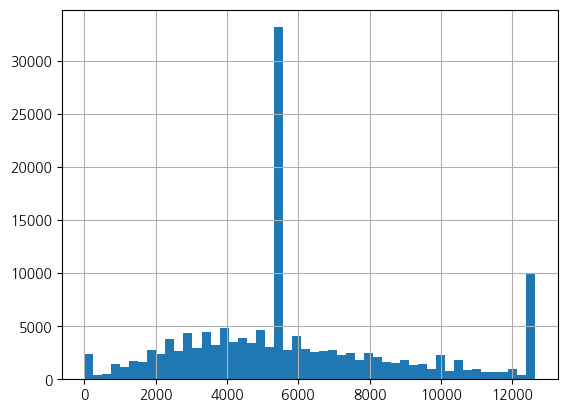

In [147]:
data.monthlyincome.hist(bins=50)
plt.show()

# 전처리한 data파일 저장

In [152]:
import os
os.makedirs('saved_data', exist_ok=True)
data.to_csv('saved_data/data-v01.csv', index=False)

### 상관관계 확인
- 시각화 : heatmap

In [149]:
data.corr()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
seriousdlqin2yrs,1.000000,0.278096,-0.115397,0.125587,0.003841,-0.056445,-0.029669,0.117175,-0.007038,0.102261,0.046869
revolvingutilizationofunsecuredlines,0.278096,1.000000,-0.279149,0.121136,-0.019307,-0.095073,-0.160531,0.109773,-0.068918,0.097818,0.090457
age,-0.115397,-0.279149,1.000000,-0.062995,0.084327,0.095960,0.147700,-0.061009,0.033172,-0.057163,-0.215676
numberoftime30-59dayspastduenotworse,0.125587,0.121136,-0.062995,1.000000,-0.027654,-0.029099,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003841,-0.019307,0.084327,-0.027654,1.000000,-0.202811,0.036488,-0.028894,0.134794,-0.028056,-0.143769
monthlyincome,-0.056445,-0.095073,0.095960,-0.029099,-0.202811,1.000000,0.266341,-0.035821,0.336804,-0.031958,0.192489
numberofopencreditlinesandloans,-0.029669,-0.160531,0.147700,-0.055312,0.036488,0.266341,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,0.117175,0.109773,-0.061009,0.983603,-0.028894,-0.035821,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,-0.007038,-0.068918,0.033172,-0.030565,0.134794,0.336804,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime60-89dayspastduenotworse,0.102261,0.097818,-0.057163,0.987005,-0.028056,-0.031958,-0.071077,0.992796,-0.039722,1.000000,-0.012678


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


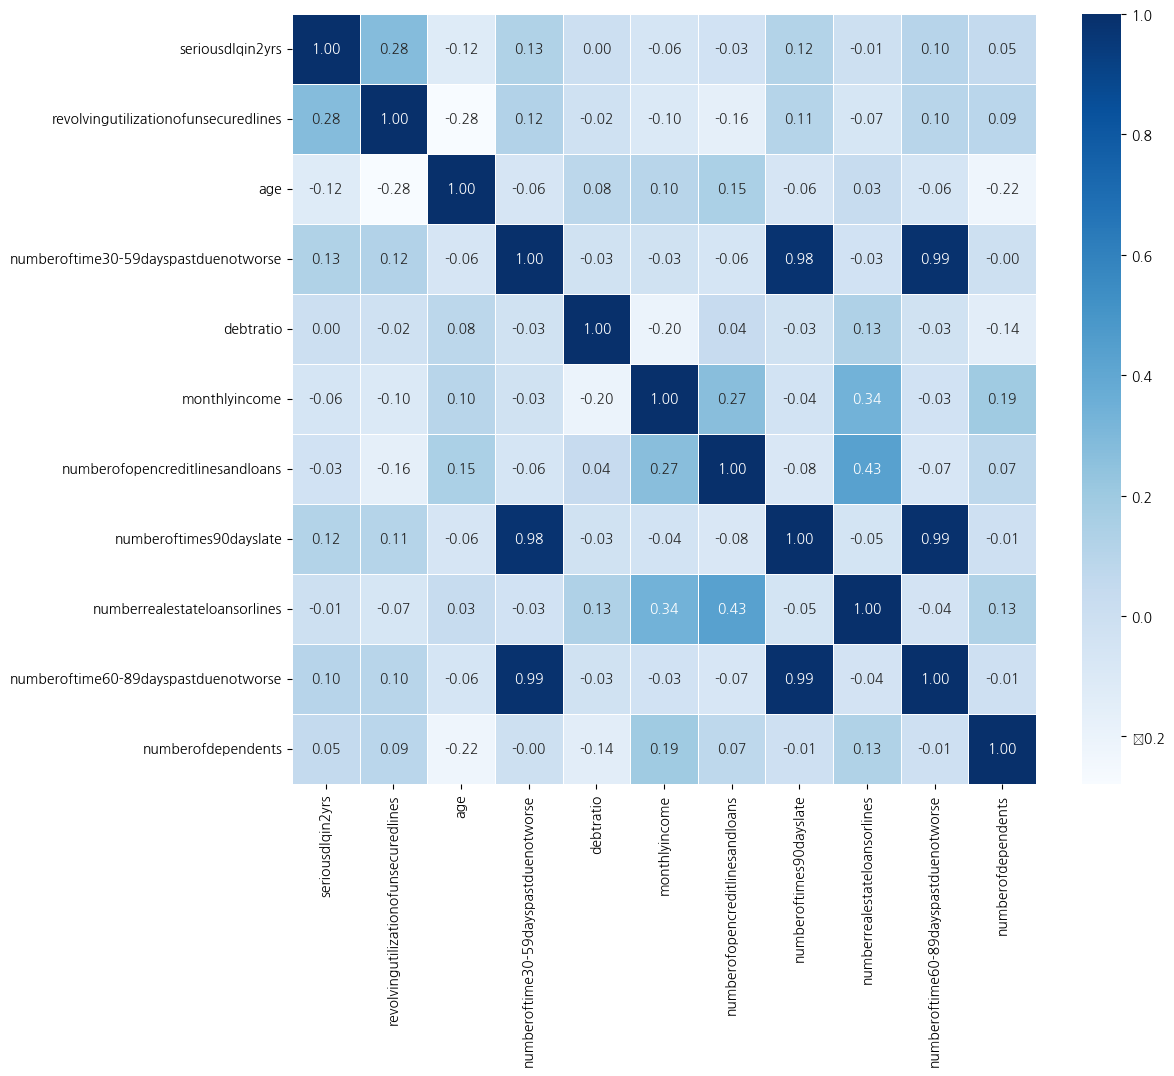

In [150]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), #상관계수행렬
            annot=True, # 색위에 값이 나오도록 처리
            fmt='.2f', # 값의 format
            cmap='Blues', # 색 팔레트, color map
            linewidths=.5)
plt.show()

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


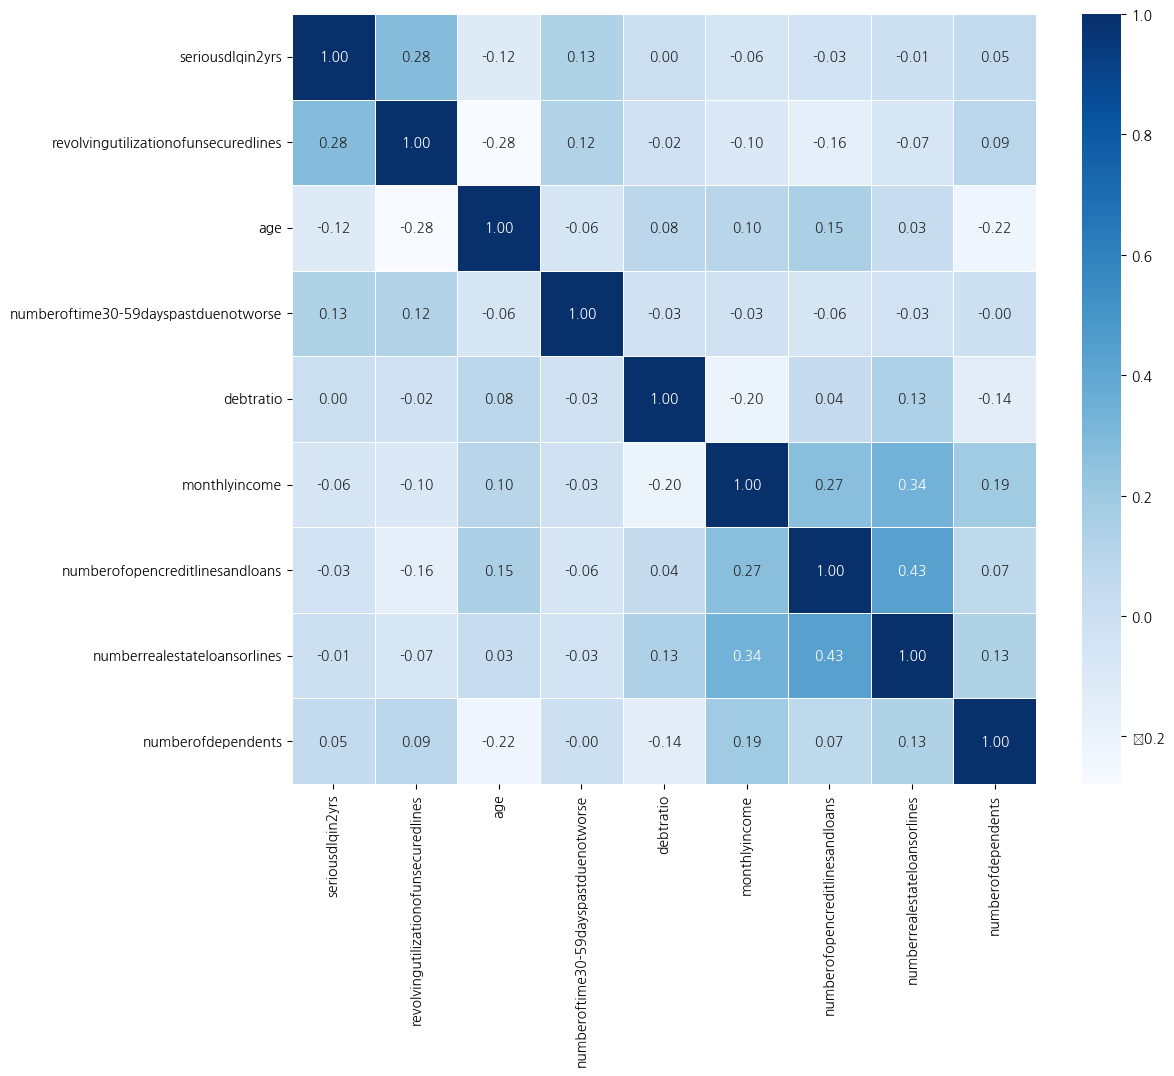

In [151]:
plt.figure(figsize=(12,10))
# 60-89, 90  이상 대출연체 횟수 컬럼을 제거->heatmap
sns.heatmap(data.drop(labels=['numberoftime60-89dayspastduenotworse', 'numberoftimes90dayslate'], axis=1).corr(), annot=True, fmt='.2f', cmap='Blues', linewidths=.5)
plt.show()

In [83]:
# 파일로 저장.
data.drop(labels=['numberoftime60-89dayspastduenotworse', 'numberoftimes90dayslate'], axis=1).to_csv('data/data-v02.csv', index=False)